<a href="https://colab.research.google.com/github/AnupKumarGupta/Machine-Learning-Lab-Assignments/blob/k-means-clustering/Clustering_on_unlabelled_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [0]:
# Load digits dataset
iris = datasets.load_iris()
# Create feature matrix
X = iris.data
# Create target vector
y = iris.target

In [71]:
kmeans = KMeans(n_clusters=3, init='random', max_iter=500)
pred_y = kmeans.fit_predict(X)
print(pred_y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [77]:
confusion_matrix_array = confusion_matrix(y, pred_y)
print(confusion_matrix_array)
print("Accuracy :: ",accuracy_score(y, pred_y, normalize=True))
print("Recall :: ",recall_score(y, pred_y, average= None))
print("Precision :: ",precision_score(y, pred_y, average= None))

[[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
Accuracy ::  0.8933333333333333
Recall ::  [1.   0.96 0.72]
Precision ::  [1.         0.77419355 0.94736842]


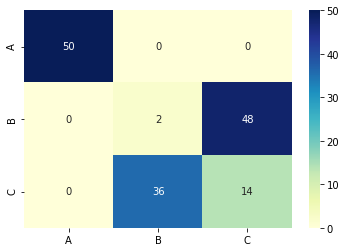

In [62]:
df_cm = pd.DataFrame(confusion_matrix_array,index = ["A","B","C"], columns = ["A","B","C"])
plt.figure(figsize = (6,4))
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

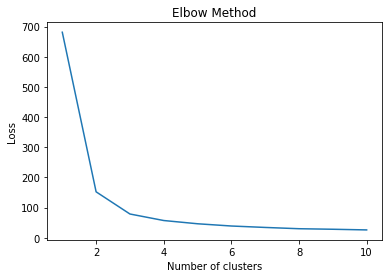

In [78]:
loss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(1, 11), loss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.show()